# MARK 5828 | Week 4 | Real Beauty Campaign - Topic Classification

![alt text](https://www.unsw.edu.au/sites/default/files/UNSW_0.png)

# Topic Classification with Python

# Introduction

##Background

[Dove Campaign for Real Beauty](https://en.wikipedia.org/wiki/Dove_Campaign_for_Real_Beauty)

The Dove Campaign for Real Beauty is a worldwide marketing campaign launched by Unilever in 2004 that includes advertisements, video, workshops, sleepover events and the publication of a book and the production of a play. The aim of the campaign is to celebrate the natural physical variation embodied by all women and inspire them to have the confidence to be comfortable with themselves.

This relatively new concept of celebrating natural looks rather than perfect/ideal/model-like looks generated a lot of reactions. 










##Aim
The aim of this exercise is to see how much interest and articles related to a similar topic (Real Beauty) the marketing campaign has generated by classifying newspaper articles topic during the marketing campaign in 2004 and 2005.

**Note**:
We are using newspaper data as newspapers were the main platform for advertising and gathering new information in 2004 and 2005.

**STEP 1 : Get access to google drive to download the data**



in this tutorial, we are going to analyse the effect of Real Beauty campaign in Canada. After we collect all the advertising sentences in Canada containing the word "beauty", we split it into two part. ten percent of sentences goes to CanadaTraining, and the rest goes to CanadaPrediction. 

In [1]:
"""Common Libraries"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"""Libraries for Text Preprocessing/Cleaning"""
import spacy; nlp = spacy.load("en") # Open Source NLP Library
import re                            # Regex
from sklearn.feature_extraction.text import CountVectorizer

"""Libraries for Text Classification"""
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

"""Libraries for Linear Regression"""
import statsmodels.api as sm

from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#download CanadaTraining.csv and CanadaPrediction.csv files from Moodle and upload it here
uploaded = files.upload()


Saving CanadaPrediction.csv to CanadaPrediction.csv
Saving CanadaTraining.csv to CanadaTraining.csv


**STEP 2 :  Read the training dataset. we will fit x and our y to the model from this dataset.**

In [0]:
#10 percent of Canada data
CA_10p = pd.read_csv('CanadaTraining.csv')

In [4]:
CA_10p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 3 columns):
Month        504 non-null int64
Category2    504 non-null object
Sentence     504 non-null object
dtypes: int64(1), object(2)
memory usage: 11.9+ KB


In [5]:
CA_10p.head()

,Month,Category2,Sentence
0,200401,product/service,mindful that trans-atlantic tourists expect pa...
1,200401,movie/play/tv,full text: charlize theron pulls off an incred...
2,200401,pageant/fashion show/model,"""beauty pageants are the world's longest-runni..."
3,200401,magazine/book,beauty or ugliness is referred to in 94 per ce...
4,200401,other,"parwais nasari, a 25-year-old cooking potato w..."


**STEP 3: Get the rest of data for prediction**

In [0]:
CA_90p = pd.read_csv('CanadaPrediction.csv')

In [8]:
CA_90p.head()

,Month,Sentence,Category2,Sample
0,200401,"he has even coined a word, africadian, which c...",NaN,NaN
1,200401,"the second piece, expendable , which is in fro...",NaN,NaN
2,200401,but while the company provides tidbits of note...,NaN,NaN
3,200401,the media still objectify the idea of being th...,NaN,NaN
4,200401,"fifteen minutes later, fuller grabbed tara kra...",NaN,NaN


# Data Cleaning

Data cleaning is an important part of any data analysis problem. In this tutorial, we will do multiple steps to clean our data. 


1.   Clean up missing values
1.   Remove any unuseful words in our sentences
2.   Remove any stopwords
3.   Remove any numbers and punctuation
1.   Lemmatise every words to its baseform








**STEP 4 : Clean the data by removing words which are not useful to our analysis.**

In [0]:
#fill the missing values
CA_10p = CA_10p.fillna(value={"Sentence":"empty sentence"}, inplace= True)
CA_90p = CA_90p.fillna(value={"Sentence":"empty sentence"}, inplace= True)

In [10]:
#change sentence from old to new
old_sentence = "I want to eat hamburger"

new_sentence = re.sub(r"hamburger", "cheese", old_sentence)

print(old_sentence)
print(new_sentence)

I want to eat hamburger
I want to eat cheese


In [0]:
def remove_badwords(old_sentence):   
  # Custom made function to remove words not useful to our analysis          
  old_sentence = re.sub(r"beauty","", old_sentence)               # all sentences have beauty, so it does not affect our topic prediction
  old_sentence = re.sub(r"full text:","", old_sentence)           # just a tag in an text advertisement
  old_sentence = re.sub(r"dove","dovevod", old_sentence)          # DOVE in here is the Brand, not a past tense of a word dive
  old_sentence = re.sub(r"advertis","ad", old_sentence)           # advertis is not a proper word
  old_sentence = re.sub(r"illustration","", old_sentence)         # just a tag in an image advertisement
  old_sentence = re.sub(r"photo:","", old_sentence)               # just a tag in a photo advertisement
  old_sentence = re.sub(r"illustration photo:","",old_sentence)   # just a tag in a photo advertisement
  old_sentence = re.sub(r"illustration caption:","",old_sentence) # just a tag in a photo advertisement
  old_sentence = re.sub(r"photographer:","",old_sentence)         # just a tag in a photo advertisement
  old_sentence = re.sub(r"photo (color):","",old_sentence)        # just a tag in a photo advertisement
  old_sentence = re.sub(r"caption:","",old_sentence)              # just a tag in a photo advertisement
  new_sentence = re.sub(r"credit:","",old_sentence)               # just a tag in a photo advertisement

  return new_sentence
       


In [0]:
# clean the sentence with function "remove_beauty" and put it into new column "Sentence Cleaned"
CA_10p['Sentence Cleaned']=CA_10p["Sentence"].apply(remove_badwords)

In [13]:
CA_10p['Sentence Cleaned'].head()

0    mindful that trans-atlantic tourists expect pa...
1     charlize theron pulls off an incredible trans...
2    " pageants are the world's longest-running rea...
3     or ugliness is referred to in 94 per cent of ...
4    parwais nasari, a 25-year-old cooking potato w...
Name: Sentence Cleaned, dtype: object

**STEP 5: Remove stopwords, numbers, and punctuations. **

Lemmatise is a process to convert any words into its base form. For example, if there is a word "said", it will be converted to "say".

In this step, we are going to remove stopwords. Sometimes, a stopword is not in its base form. For example,  "was" or "were" is a stopword but not in its baseform. Their baseform is "be". Therefore, we need to lemmatise each word before we can get any stopwords from all sentences

The library that we use to lemmatise our words and get all stopwords list is **spaCy**. 



The function **remove_stopwords**:



1.   Take all sentences as an input
2.   Iterates each word in every sentence (in a loop). 
  - If the word is a stop word, ignore it.
  - If it is not a stopword, put that word into a list. 
3. Combine the list into a sentence again

Example : the starting sentence `"I want to break free"`

will become

`[break, free]` (a list, this process is called **tokenisation**)

because `"I"`,`"want"`, and `"to"` are **stopwords**, they are ignored and removed.

By joining the remaining words, the final sentence would be `"break free"`

In [0]:
def remove_stopwords(all_sentences):# all_sentences is list of all sentences        
  # get stopwords from Spacy
  full_stopwords = set(nlp.Defaults.stop_words)
        
  # customise our stopwords
  our_stopwords = full_stopwords.difference({"whole","yourself","myself","beyond","every","behind","more", "than", "beyond", "all", "many", "not", "just"})
  combined = []
  
  for sentence in all_sentences: # loop in every sentence
    sentence_without_stopword = [] # list for a new and clean sentence
    for this_word in nlp(sentence): # check each word with nlp function
      if this_word.lemma_ in our_stopwords:
        continue # Go straight to the next iteration for the current for loop
      else:
        sentence_without_stopword.append(str(this_word)) # append all non-stopword words
    sentence_without_stopword = " ".join(sentence_without_stopword) # convert the list into a sentence
    combined.append(sentence_without_stopword) # combine all new sentences
  return combined

In [0]:
#clean the sentence with function "remove_stopwords" and put it into new column "Sentence Cleaned"

#get our list of all sentences
all_sentences = CA_10p["Sentence Cleaned"].values

#remove all stopwords in all sentences
CA_10p["Sentence Cleaned"]= remove_stopwords(all_sentences)

In [16]:
CA_10p["Sentence Cleaned"].head()

0    mindful trans - atlantic tourists expect pampe...
1      charlize theron pulls incredible transformat...
2    " pageants world 's longest - running reality . "
3      ugliness referred 94 cent grimms ' fairy tal...
4    parwais nasari , 25-year - old cooking potato ...
Name: Sentence Cleaned, dtype: object

**STEP 5 (CONTINUED) Lemmatise each word and tokenise each sentence**

Tokenise is a process where we split a sentence into a list, then inside that list we will have all the words taken from the sentence as the list's element. 

for example: 
Sentence  = " I want to break free"

if you run sentence.split()

you will get  a list` ["I","want","to","break","free"]`.




This function below will remove all numbers and punctuations, lemmatise all words, convert a sentence into a list with every words of a sentence as elements of that list. 

The process is similar to previous function function, remove_stopwords:



1.   Take all sentence s as an input
2.   check each words in every sentence, if it is a number or punctuation
1.   IF it is not, put that word into a list.


the difference is we do not join the list into a sentence. hence, the name of this function is tokenise_function

example : starting sentence is ""I want to become a number 1"

will become

`["I", "want", "to", "become","a","number"]`



In [0]:
def tokenise_sentence(all_sentences):
  
# clean the sentence from number punctuation and lemmatise all words from all sentence.
   
  all_tokenise_sentence = []
   
  for sentence in all_sentences:
    tokenise_sentence = []              #list to get the root words
    for this_word in nlp(sentence):
      
      if (this_word.is_punct) or not(this_word.is_alpha): #remove all numbers or punctuation
        continue
        
      else:
        #convert this word into its base form and insert it into our tokenise_sentence
        tokenise_sentence.append(this_word.lemma_)
    
    #after all words have been converted into their base form, insert it into our list
    all_tokenise_sentence.append(tokenise_sentence)
            
       
  return all_tokenise_sentence

In [0]:
#get all sentences from CanadaTraining data
all_sentences = CA_10p['Sentence Cleaned'].values

#convert it into tokenise sentences using tokenise_sentence function
all_tokenise_sentences = tokenise_sentence(all_sentences)

In [21]:
#the output of this are the list of tokenise sentence
all_tokenise_sentences
#from Spacy documentation: all pronouns are lemmatized to the special token -PRON-




[['mindful',
  'tran',
  'atlantic',
  'tourist',
  'expect',
  'pamper',
  'procedure',
  'more',
  'emphasis',
  'feel',
  'good',
  'massage',
  'treatment'],
 ['charlize',
  'theron',
  'pull',
  'incredible',
  'transformation',
  'blond',
  'serial',
  'killer',
  'film',
  'attempt',
  'validate',
  '-PRON-',
  'action',
  'work'],
 ['pageant', 'world', 'longest', 'run', 'reality'],
 ['ugliness',
  'refer',
  'cent',
  'grimms',
  'fairy',
  'tale',
  'evil',
  'character',
  'describe',
  'ugly'],
 ['parwai',
  'nasari',
  'old',
  'cooking',
  'potato',
  'waffle',
  'kabul',
  'market',
  'stall',
  '-PRON-',
  'sip',
  'green',
  'tea',
  'dinner',
  '-PRON-',
  'family',
  'salma',
  'appear',
  'sing',
  'pashto',
  'language',
  'ode',
  'afghan',
  'mountain'],
 ['parwai',
  'nasari',
  'old',
  'cooking',
  'potato',
  'waffle',
  'kabul',
  'market',
  'stall',
  '-PRON-',
  'sip',
  'green',
  'tea',
  'dinner',
  '-PRON-',
  'family',
  'salma',
  'appear',
  'sing',

# Model Training

In previous week, we use X (independant variables) in our model to see if they will affect our Y (dependant variables). We fit our X and Y into our model, then see their regression analysis result. Usually, our X variables are the detail information about a picture (like in Week1) or a video (like in Week2). But this time, we use sentences as our data. Then, what are our X and Y variables? 

The answer: our X variables are all words in each sentence, and our Y is the topic of each sentence.
Therefore, we need to get all the words in all sentences then make them into our X variables. we will have a table with all words in our columns and all sentences in our rows. 

Examples, we have three sentences. "I want to eat", "I want to sleep", "I want to sleep and sleep again". Then, our table for those three sentences is:


![alt text](https://i.imgur.com/EdshmHI.png)

We call this table as "Document Term Matrix". Basically, we count the frequency of all words in our sentence, and put it into our table. 

We will use CountVectorizer from sklearn to process all our sentence into a document term matrix. this function will take all sentences as a input, then tokenise all the sentences, and then count the frequency of all words in each sentences. 



**STEP 6 : Count the frequency of every word in every sentence using CountVectorizer**

In [0]:
#set lowercase false because we already have all lowercase sentence
#set tokenizer to a simple lambda function because we already have a tokenise input
count = CountVectorizer(lowercase = False, tokenizer=lambda x:x)
count.fit(all_tokenise_sentences)

#get the document term matrix from CanadaTraining
dtm10p = count.transform(all_tokenise_sentences)

In [23]:
#if we run this line of code we will see our Document Term Matrix
pd.DataFrame(dtm10p.toarray(), columns = count.get_feature_names())

,-PRON-,able,aboriginal,absolute,absorb,absurd,academy,accent,accept,acceptable,...,yellow,yeslam,yesterday,york,yorkville,young,youth,youthful,youthfulness,zayed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


###Text classification
Text classification is a process of classifying text into one or more categories based on each word in the sentence. in this tutorial, we are going to classify advertising sentence on newspaper into 7 categories:


*   Real Beauty
*  Product/Service
*   Magazine/Book
*   Movie/Play/TV
*   Beauty Pagent
*   Physical Beauty
*   Other

**STEP 7 Create the model**

### Logistic Regression

Linear regression model are used to show or predict the relationship between two variables or factors. The factor that is being predicted (the factor that the equation solves for) is called the dependent variable (y) .The factors that are used to predict the value of the dependent variable are called the independent variables (x) . 

In Linear regression model, the independent variable is usually a continues variable (such as number of likes, price, etc). if we have a linear regression equation :

$ sicknessLevel = const + m_1.isTreated + m_2.timeAfter + m_3.isTreated.timeAfter $

the **sicknessLevel** is a continuous variable. But in this tutorial, we want to predict a discrete variable, not a continuous variable, such as an animal, a gender, or a topic/category. this problem is called a **classification problem**.


With this problem, we can use a logistic regression model. 

In logistic regression model, we use the same formula. However, our independent variable is a probability of one single row of data belongs to a category. Say, we have a linear regression equation 
$Y = β0 + β1X$

in this equation, our Y is still a continuous number, not a probability. So we need to transform this equation so we can get a Y which is a probability between 0 or 1.  We use a logistic function to get this probability:

**The probability of Y is Topic C given any particular X is**
$P(Y = C|X) = \frac {e^{β0+β1X}} {(  1 + e^{β0+β1X})} $ 


**The probability of Y is not Topic C given any particular X is**
$P(Y \neq C|X) = \frac {1}  {( 1 + e^{β0+β1X})} $


Notice that if you sum two equation, you will get 1.




### Naive Bayes

Another common model for classification problem is a Naive Bayes.  Naive Bayes model is based on Bayes theorem : 

$P(C|X) = \frac {P(X|C) * P(C)}{P(X)}$

you can read it as

*Probability of topic C, given a particular X = probability of X, given any particular topic C multiplied by probability of topic C , divided by the probability of X*



### Which model is better?

More info about Logistic Regression and Naive Bayes Classifier:
Chapter 3: GENERATIVE AND DISCRIMINATIVE
CLASSIFIERS:
NAIVE BAYES AND LOGISTIC REGRESSION

http://www.cs.cmu.edu/~tom/mlbook/NBayesLogReg.pdf

We cannot say one model is better than the other. Therefore, in this tutorial we are going to compare both models to see which one is better with our Canada dataset. First, let's create our model. 

In [0]:
def create_model():
  #create model list
  model_list=[]
  logreg = LogisticRegression(class_weight = 'balanced') ; model_list.append(logreg)
  naivebay = MultinomialNB(); model_list.append(naivebay)
         
  return model_list

model = create_model()

In [25]:
model

[LogisticRegression(C=1.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
           solver='warn', tol=0.0001, verbose=0, warm_start=False),
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)]

Get our Y  , which are the sentence topics.

**STEP 8 : Fit our X and Y into the first (Logistic Regression) and second model (Naive Bayes)**

In [27]:
CA_10p[CA_10p["Category2"]== "real beauty"]

,Month,Category2,Sentence,Sentence Cleaned
30,200402,real beauty,"it is awesome that dove, a beauty product manu...","it awesome dovevod , product manufacturer , ..."
42,200403,real beauty,beauty isn't always all it appears to be:.,n't all it appears : .
55,200404,real beauty,we canothert compare all women to an old-fashi...,we canothert compare all women old - fashioned...
62,200404,real beauty,"that's because, you see, the show doesn't want...",", you , n't want audience think just skin de..."
68,200405,real beauty,banderas says one of the main reasons he was s...,banderas main reasons he interested shrek 2 it...
69,200405,real beauty,"""this whole concept of beauty, to me, is all a...",""" whole concept , me , all accepting you ."
133,200408,real beauty,"""i think we've become obsessed with beauty and...",""" think we obsessed fountain youth frankly ,..."
134,200408,real beauty,"beauty isn't scalpel deep, halle berry says.","n't scalpel deep , halle berry ."
138,200409,real beauty,a research consultant for the real truth about...,research consultant real truth : global report...
139,200409,real beauty,"""women have an inability to feel like they cou...",""" women inability feel like they count culture..."


In [29]:
# get our dependent variables (Y) from CanadaTraining
y = CA_10p["Category2"]

# fit our dtm and y into our two model, Logistic Regression and Naive Bayes
logreg = model[0].fit(dtm10p, y)
naivebayes = model[1].fit(dtm10p,y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Test accuracy

In [30]:
print("Model: Logreg, Accuracy : ", end= "")
print(accuracy_score(logreg.predict(dtm10p), y))
print("Model: Multinomial NaiveBayes, Accuracy : ", end= "")
print(accuracy_score(naivebayes.predict(dtm10p), y))

Model: Logreg, Accuracy : 0.998015873015873
Model: Multinomial NaiveBayes, Accuracy : 0.9781746031746031


# Model Prediction

After we fit our model, we can use our model to predict a topic of any sentences. We will use our model to predict our 90% sentences of Canada. Before we predict the sentence, make sure you already clean all the sentences from stopwords, punctuation, number,unuseful words, and lemmatise  every words

**STEP 9 : clean data from Canada prediction data**

In [0]:
#create new column for all sentences after we clean them in function remove_beauty
CA_90p['Sentence Cleaned']=CA_90p["Sentence"].apply(remove_badwords)

#get all sentences from CanadaPrediction
all_sentences = CA_90p['Sentence Cleaned'].values

#remove all stopwords from the sentence
CA_90p["Sentence Cleaned"]= remove_stopwords(all_sentences)



In [0]:
#get all sentences from CanadaPrediction data after we remove all stopwords
all_sentences = CA_90p['Sentence Cleaned'].values

#convert it into tokenise sentences
all_tokenise_sentences = tokenise_sentence(all_sentences)


In [33]:
all_tokenise_sentences

[['-PRON-',
  'coin',
  'word',
  'africadian',
  'capture',
  'isolation',
  'quiet',
  'pride',
  '-PRON-',
  'people'],
 ['second',
  'piece',
  'expendable',
  '-PRON-',
  '-PRON-',
  'enter',
  'gallery',
  'consist',
  'octagonal',
  'glass',
  'aquarium',
  'pair',
  'look',
  'like',
  'red',
  'glass',
  'shoe',
  'like',
  'dorothy',
  'wear',
  'wizard',
  'oz',
  'sit',
  'pile',
  'sand'],
 ['company',
  'provide',
  'tidbit',
  'note',
  'world',
  'dance',
  'feature',
  'moment',
  'real',
  '-PRON-',
  'absence',
  'plot',
  'fail',
  'attract',
  'audience',
  'beyond',
  'dance',
  'community',
  'worship',
  'altman',
  'altar'],
 ['medium',
  'objectify',
  'idea',
  'thin',
  '-PRON-',
  'holy',
  'grail',
  '-PRON-',
  'british',
  'fashion',
  'model',
  'twiggy',
  'nickname',
  'come',
  '-PRON-',
  'stick',
  'like',
  'figure'],
 ['minute',
  'later',
  'grab',
  'tara',
  'kraft',
  'star',
  'brand',
  'new',
  'director',
  'volunteer',
  'cover',
  'clos

**STEP 10 : Get the document term matrix from CanadaPrediction data**


In [0]:
#convert all tokenise sentence into document term matrix
dtm90p = count.transform(all_tokenise_sentences)

In [37]:
#if we run this line of code we will see our Document Term Matrix
pd.DataFrame(dtm90p.toarray(), columns = count.get_feature_names())

,-PRON-,able,aboriginal,absolute,absorb,absurd,academy,accent,accept,acceptable,...,yellow,yeslam,yesterday,york,yorkville,young,youth,youthful,youthfulness,zayed
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**STEP 11 : Predict the topic of 90percent sentences by putting our document term matrix into our model.**

In [0]:
#put our prediction into a new column

CA_90p["Prediction_logreg"] = logreg.predict(dtm90p)
CA_90p["Prediction_naivebayes"] = naivebayes.predict(dtm90p)


In [39]:
CA_90p.head()

,Month,Sentence,Category2,Sample,Sentence Cleaned,Prediction_logreg,Prediction_naivebayes
0,200401,"he has even coined a word, africadian, which c...",NaN,NaN,"he coined word , africadian , captures , isola...",other,other
1,200401,"the second piece, expendable , which is in fro...",NaN,NaN,"second piece , expendable , you you enter gall...",other,other
2,200401,but while the company provides tidbits of note...,NaN,NaN,company provides tidbits note world dance feat...,other,real beauty
3,200401,the media still objectify the idea of being th...,NaN,NaN,media objectify idea thin it holy grail it 1...,other,real beauty
4,200401,"fifteen minutes later, fuller grabbed tara kra...",NaN,NaN,"minutes later , grabbed tara kraft , star 's b...",other,other


**STEP 12 : Check the accuracy by taking 100 sentences from our prediction and give them a right label**

If you see in CanadaPrediction data, you will see a column name "sample". if that column contain 1, it means that particular sentence has a topic given by a human. you can see it's human-label in column "Category2". in total, there are 100 samples of sentence.

We will use this 100 sentence to check the prediction accuracy of our model. We will compare the prediction from our model versus the topic given by a human.

Let's get that 100 sample:

In [0]:
CA_90p.head()

In [0]:
#test our prediction accuracy with CanadaTesting
CanadaTesting = CA_90p.loc[CA_90p["Sample"]==1]


In [42]:
#we take 100 sentences from CanadaPrediction, then we give them correct label. we use this human-label to compare it with the model-predicted label and assess its accuracy 
#column Category2 is the human-label
CanadaTesting.head()


,Month,Sentence,Category2,Sample,Sentence Cleaned,Prediction_logreg,Prediction_naivebayes
52,200401,m.a.c cosmetics guru gregory arlt anticipates...,product/service,1.0,m.a.c cosmetics guru gregory arlt anticipate...,other,product/service
61,200401,"but tales like cinderella, sleeping and snow ...",magazine/book,1.0,"tales like cinderella , sleeping snow white ...",magazine/book,magazine/book
97,200401,"many argue that in the simplistic tales, or u...",magazine/book,1.0,"many argue simplistic tales , ugliness used ...",magazine/book,magazine/book
108,200401,"""i think the message that's given to girls is ...",physical beauty,1.0,""" think message girls important traits femal...",physical beauty,physical beauty
171,200401,the five-foot-nine is a cross between a young...,physical beauty,1.0,"- foot - cross young jane birkin kate moss ,...",other,movie/play/tv


**STEP 13 : Compare our prediction with the prediction given by the model**

In [0]:
#compare the accuracy using accuracy_score function
accuracy = {
  "Logreg": accuracy_score(CanadaTesting["Prediction_logreg"], CanadaTesting["Category2"]),
  "Naive Bayes": accuracy_score(CanadaTesting["Prediction_naivebayes"], CanadaTesting["Category2"])
}

**STEP 14: Get the best model (model with the best accuracy)**

In [44]:
accuracy

{'Logreg': 0.72, 'Naive Bayes': 0.74}

our first model Logistic Regression has 0.72 accuracy, while our second model of Naive Bayes has 0.74 accuracy. It means, we will take the prediction from Naive Bayes model.

# Plotting

**STEP 15: Plot our prediction.**

In [0]:
CA_90p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4906 entries, 0 to 4905
Data columns (total 7 columns):
Month                    4906 non-null int64
Sentence                 4906 non-null object
Category2                100 non-null object
Sample                   100 non-null float64
Sentence Cleaned         4906 non-null object
Prediction_logreg        4906 non-null object
Prediction_naivebayes    4906 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 268.4+ KB


In [45]:
# Group by Month and get the number of sentences in each category
pt = CA_90p.groupby(["Month", "Prediction_naivebayes"]).size().unstack(fill_value=0)
pt

Prediction_naivebayes,magazine/book,movie/play/tv,other,pageant/fashion show/model,physical beauty,product/service,real beauty
Month,,,,,,,
200401,46,29,96,3,4,26,27
200402,6,24,70,1,1,12,38
200403,9,10,49,1,0,13,17
200404,3,18,74,7,0,24,21
200405,6,26,97,5,0,37,26
200406,8,14,63,12,0,22,13
200407,2,9,79,8,0,32,16
200408,12,25,115,7,0,25,33
200409,6,15,116,30,0,25,75


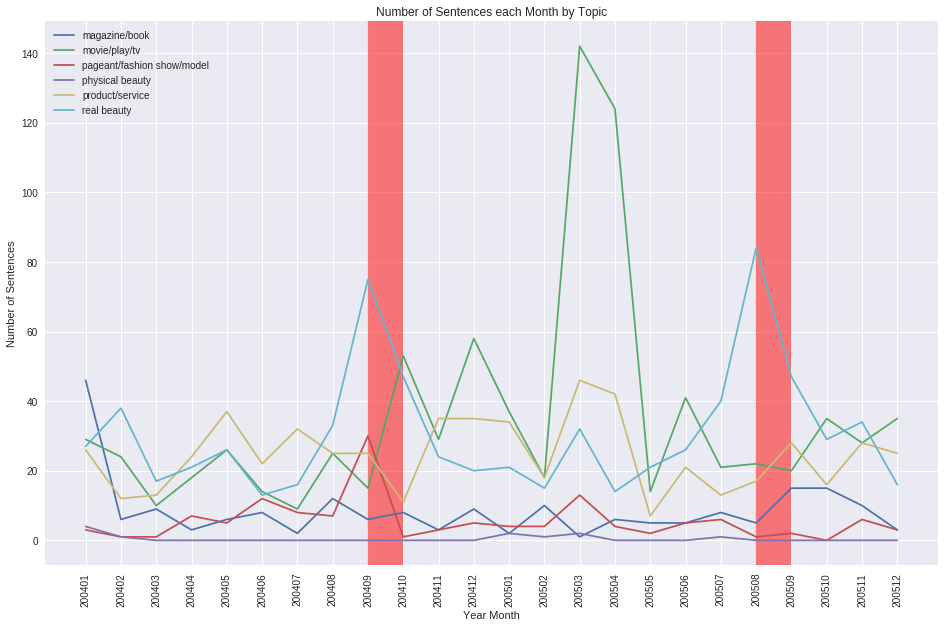

In [46]:
topic_no_other = ['magazine/book', 'movie/play/tv', 'pageant/fashion show/model', 'physical beauty', 'product/service', 'real beauty']
months = list(pt.index.astype(str))

start1 = months.index("200409")
end1 = months.index("200410")
start2 = months.index("200508")
end2 = months.index("200509")

fig, ax = plt.subplots(1, 1, figsize=(16, 10)) # Initialise Graph

ax.plot(months, pt[topic_no_other])            # Plot Graph

"""Set Title, x axis, y axis, legend and add ad periods"""
plt.xticks(rotation=90)
ax.set_title("Number of Sentences each Month by Topic")
ax.set_ylabel('Number of Sentences')
ax.set_xlabel('Year Month')
ax.legend(topic_no_other)
_ = ax.axvspan(start1, end1, color='red', alpha=0.5)
_ = ax.axvspan(start2, end2, color='red', alpha=0.5)

plt.show() # "Print plot"

# Linear Regression Analysis

### AIM

Remember the example of medicine treatment on Week3? 

We want to determine how effective a medicine is for a particular sickness. In order to measure its effectiveness, we need to
- Measure the "sickness level" of the person (person A) **before** and **after** the a time period (WITH treatment).
- Measure the "sickness level" of another person (person B) **before** and **after** the same time period (WITHOUT treatment)
- Compare those differences.

Now let's apply this to our Real Beauty campaign and replace some words.

- **Medicine**: Performs Real Beauty Campaign.
- **Sickness Level**: The Number of Sentences. (Our Y)
- **Treatment Group**: Real Beauty topic.
- **Control Group**: Other topics .
- **After**: During the Real Beauty Campaign


### Data Variable
Variable | Type | Description | Why do we need this?
--|--
The Number of Sentences | integer | the number of sentences | This is our *y* variable!
Month | String | month |Year and Month.
Category | String | The topic of the sentence | These contain our treatment and control groups (real beauty topics and other topics).
On Campaign | Boolean | During **Real Beauty** Advertising Campaign | To see how effective the ad was during the campaign.



**STEP 16 : Create a table to get the significance for real beauty campaign**


In [0]:
#create a table with index Prediction of Naivebayes and Month, and with a value of number of sentences
regression_table = CA_90p.groupby(['Prediction_naivebayes','Month'])[["Sentence"]].count()

#rename columns Sentences to Number of Sentences
regression_table.rename(columns={"Sentence":"Number of Sentences"}, inplace=True)

#get the column Month
regression_table["month"]= regression_table.index.get_level_values(1).astype(str)

#get the column category
regression_table["category"] = regression_table.index.get_level_values(0).astype(str)



In [48]:
regression_table

Number of Sentences   month         category
Prediction_naivebayes Month                                               
magazine/book         200401                   46  200401    magazine/book
                      200402                    6  200402    magazine/book
                      200403                    9  200403    magazine/book
                      200404                    3  200404    magazine/book
                      200405                    6  200405    magazine/book
                      200406                    8  200406    magazine/book
                      200407                    2  200407    magazine/book
                      200408                   12  200408    magazine/book
                      200409                    6  200409    magazine/book
                      200410                    8  200410    magazine/book
                      200411                    3  200411    magazine/book
                      200412                    9  200412    magazine/book
                      200501                    2  200501    magazine/book
                      200502                   10  200502    magazine/book
                      200503                    1  200503    magazine/book
                      200504                    6  200504    magazine/book
                      200505                    5  200505    magazine/book
                      200506                    5  200506    magazine/book
                      200507                    8  200507    magazine/book
                      200508                    5  200508    magazine/book
                      200509                   15  200509    magazine/book
                      200510                   15  200510    magazine/book
                      200511                   10  200511    magazine/book
                      200512                    3  200512    magazine/book
movie/play/tv         200401                   29  200401    movie/play/tv
                      200402                   24  200402    movie/play/tv
                      200403                   10  200403    movie/play/tv
                      200404                   18  200404    movie/play/tv
                      200405                   26  200405    movie/play/tv
                      200406                   14  200406    movie/play/tv
...                                           ...     ...              ...
product/service       200507                   13  200507  product/service
                      200508                   17  200508  product/service
                      200509                   28  200509  product/service
                      200510                   16  200510  product/service
                      200511                   28  200511  product/service
                      200512                   25  200512  product/service
real beauty           200401                   27  200401      real beauty
                      200402                   38  200402      real beauty
                      200403                   17  200403      real beauty
                      200404                   21  200404      real beauty
                      200405                   26  200405      real beauty
                      200406                   13  200406      real beauty
                      200407                   16  200407      real beauty
                      200408                   33  200408      real beauty
                      200409                   75  200409      real beauty
                      200410                   47  200410      real beauty
                      200411                   24  200411      real beauty
                      200412                   20  200412      real beauty
                      200501                   21  200501      real beauty
                      200502                   15  200502      real beauty
                      200503                   32  2005


**STEP 17: **
In week 3, we create a column **during** with value 0 if the brand is **not Samsung** or **the duration is not during the advertisement campaign**, and value 1 if the **brand is Samsung and there is an advertisement campaign during that particular date**.

Similarly, 
to analyse the effectiveness of Real Beauty campaign, we create a column **on campaign** with a value 0 if there is **not any real beauty campaign at that month** , and 1 **if there is a real beauty campaign during that particular month and the topic of that sentence is Real beauty**.
"

In [0]:
#set the month where Real beauty campaign is happened in Canada
campaign = ["200409", "200410", "200508", "200509"]

#np.where has the same function as if-else in Excel
regression_table["on campaign"] = np.where((regression_table['month'].isin(campaign) & (regression_table['category'].isin(["real beauty"]))), 1, 0)

In [50]:
regression_table

Number of Sentences   month         category  \
Prediction_naivebayes Month                                                  
magazine/book         200401                   46  200401    magazine/book   
                      200402                    6  200402    magazine/book   
                      200403                    9  200403    magazine/book   
                      200404                    3  200404    magazine/book   
                      200405                    6  200405    magazine/book   
                      200406                    8  200406    magazine/book   
                      200407                    2  200407    magazine/book   
                      200408                   12  200408    magazine/book   
                      200409                    6  200409    magazine/book   
                      200410                    8  200410    magazine/book   
                      200411                    3  200411    magazine/book   
                      200412                    9  200412    magazine/book   
                      200501                    2  200501    magazine/book   
                      200502                   10  200502    magazine/book   
                      200503                    1  200503    magazine/book   
                      200504                    6  200504    magazine/book   
                      200505                    5  200505    magazine/book   
                      200506                    5  200506    magazine/book   
                      200507                    8  200507    magazine/book   
                      200508                    5  200508    magazine/book   
                      200509                   15  200509    magazine/book   
                      200510                   15  200510    magazine/book   
                      200511                   10  200511    magazine/book   
                      200512                    3  200512    magazine/book   
movie/play/tv         200401                   29  200401    movie/play/tv   
                      200402                   24  200402    movie/play/tv   
                      200403                   10  200403    movie/play/tv   
                      200404                   18  200404    movie/play/tv   
                      200405                   26  200405    movie/play/tv   
                      200406                   14  200406    movie/play/tv   
...                                           ...     ...              ...   
product/service       200507                   13  200507  product/service   
                      200508                   17  200508  product/service   
                      200509                   28  200509  product/service   
                      200510                   16  200510  product/service   
                      200511                   28  200511  product/service   
                      200512                   25  200512  product/service   
real beauty           200401                   27  200401      real beauty   
                      200402                   38  200402      real beauty   
                      200403                   17  200403      real beauty   
                      200404                   21  200404      real beauty   
                      200405                   26  200405      real beauty   
                      200406                   13  200406      real beauty   
                      200407                   16  200407      real beauty   
                      200408                   33  200408      real beauty   
                      200409                   75  200409      real beauty   
                      200410                   47  200410      real beauty   
                      200411                   24  200411      real beauty   
                      200412                   20  200412      real beauty   
                      200501                   21  2

Step 18: Convert the categorical variable into a numerical using get_dummies

In [0]:
regression_dummy = pd.get_dummies(regression_table, drop_first = True)

In [52]:
regression_dummy

Number of Sentences  on campaign  month_200402  \
Prediction_naivebayes Month                                                    
magazine/book         200401                   46            0             0   
                      200402                    6            0             1   
                      200403                    9            0             0   
                      200404                    3            0             0   
                      200405                    6            0             0   
                      200406                    8            0             0   
                      200407                    2            0             0   
                      200408                   12            0             0   
                      200409                    6            0             0   
                      200410                    8            0             0   
                      200411                    3            0             0   
                      200412                    9            0             0   
                      200501                    2            0             0   
                      200502                   10            0             0   
                      200503                    1            0             0   
                      200504                    6            0             0   
                      200505                    5            0             0   
                      200506                    5            0             0   
                      200507                    8            0             0   
                      200508                    5            0             0   
                      200509                   15            0             0   
                      200510                   15            0             0   
                      200511                   10            0             0   
                      200512                    3            0             0   
movie/play/tv         200401                   29            0             0   
                      200402                   24            0             1   
                      200403                   10            0             0   
                      200404                   18            0             0   
                      200405                   26            0             0   
                      200406                   14            0             0   
...                                           ...          ...           ...   
product/service       200507                   13            0             0   
                      200508                   17            0             0   
                      200509                   28            0             0   
                      200510                   16            0             0   
                      200511                   28            0             0   
                      200512                   25            0             0   
real beauty           200401                   27            0             0   
                      200402                   38            0             1   
                      200403                   17            0             0   
                      200404                   21            0             0   
                      200405                   26            0             0   
                      200406                   13            0             0   
                      200407                   16            0             0   
                      200408                   33            0             0   
                      200409                   75            1             0   
                      200410                   47            1             0   
                      200411                   24            0             0   
                      200412  

In [53]:
y = regression_dummy["Number of Sentences"] #the total number of sentences is our Y
x = regression_dummy.drop(["Number of Sentences"], axis=1)


constant = sm.add_constant(x)
model = sm.OLS(y, constant).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Number of Sentences   R-squared:                       0.830
Model:                             OLS   Adj. R-squared:                  0.787
Method:                  Least Squares   F-statistic:                     19.25
Date:                 Fri, 15 Mar 2019   Prob (F-statistic):           1.01e-32
Time:                         09:07:17   Log-Likelihood:                -614.27
No. Observations:                  149   AIC:                             1291.
Df Residuals:                      118   BIC:                             1384.
Df Model:                           30                                         
Covariance Type:             nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## Conclusion

 Based on the statistical result, our X variabel "On Campaign" has pvalue 0.001. it means it is proven that when the Real Beauty campaign was launched, the number of real beauty sentence was also increased. 

